In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
data = pd.read_csv("foodtruck.csv",delimiter=",")
data = np.array(data)

In [144]:
X = data[::,:1]
Y = data[::,1:]

In [145]:
Y.transpose()

array([[17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
         4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
         3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
         3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
         3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
        -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
         4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
         5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
         8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
         1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
         5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
         5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
         1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
         6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
         5.3436 ,  4.2415 ,  6.7981 ,  0.92695, 

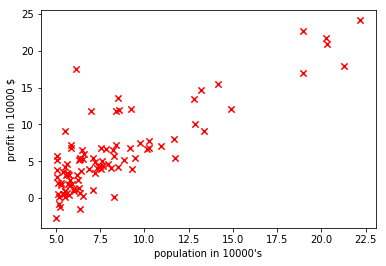

In [146]:
plt.scatter(X.transpose(),Y.transpose(),40,color="red",marker="x")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

In [147]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,2)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,2))
X_bias[::,1:] = X
# output first 5 X_bias examples
X_bias[0:5,:]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [148]:
#define function to find cost
def cost(X_bias,Y,Theta):
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [149]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost function")
    plt.show()
    return Theta

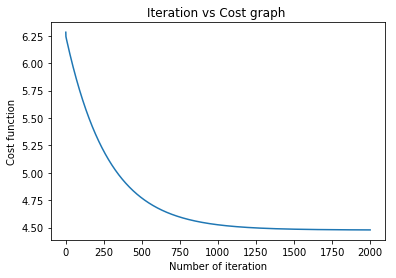

In [150]:
alpha = 0.01
iterations = 2000 #the value of iterations is 1500 enough. 2000 uses for demonstration
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)

In [169]:
# predict the profit for city with 30730 and 75000 people
X_test = np.array([[1,3.073],[1,7.5]])
hypothesis = X_test.dot(Theta.transpose())
print ('profit from 30730 people city is ',hypothesis[0,0]*10000,'$')
print ('profit from 75000 people city is ',hypothesis[1,0]*10000,'$')

profit from 30730 people city is  9160.578355793798 $
profit from 75000 people city is  50814.79453415156 $


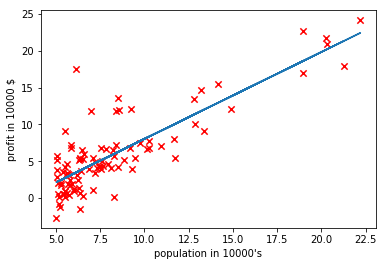

In [152]:
# Plot showing hypothesis 
plt.scatter(X.transpose(),Y.transpose(),40,color="red",marker="x")
X_axis = X
Y_axis = X_bias.dot(Theta.transpose())
plt.plot(X_axis,Y_axis)
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

In [153]:
from sklearn import linear_model

In [159]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
reg.score(X,Y)

0.7020315537841397

In [166]:
# m = 0
# c = 0
# lr = 0.001
# iteration = 1000
# n = len(X)

# for i in range(len(X)):
#     y_predict = m*X + c
#     D_m = (-2/n) * sum(X * (y - y_predict))
#     D_c = (-2/n) * sum(y - y_predict)
#     m = m - lr * D_m
#     c = c - lr*D_c
print(m, c)

[0.9145382] [-1.1236019]


In [165]:
m = 0
c = 0

L = 0.00001  # The learning Rateac
epochs = 100000 # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

[0.9145382] [-1.1236019]
